# Central Limit Theorem

Let's use the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) in a dataset.

Take a population and measure a value (size, weight, etc.) for each individual.

The important thing to know is that **whatever** the form of the distribution over the population, the **sampling** distribution tends to a Gaussian, and its dispersion is given by the Central Limit Theorem.

Let's verify this experimentally!

---

## Let's start

Run the following cell to import modules for the livecode

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

❓ Load the `"total_bill"` dataset from seaborn into a `df` variable and display the head

<details>
    <summary>💡 View hint</summary>
    You can use <a href="https://seaborn.pydata.org/generated/seaborn.load_dataset.html"><code>seaborn.load_dataset</code></a>
</details>

In [2]:
df = sns.load_dataset('tips')

❓ How many rows are available in the dataset?

In [3]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df.shape

(244, 7)

❓ Plot the distribution of the `total_bill` column in the restaurant

In [106]:
# describe
df.describe()[['total_bill']]

,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


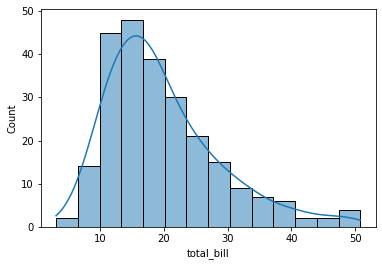

In [6]:
# plot hisplot
sns.histplot(df['total_bill'], kde=True);
plt.plot()

In [7]:
maximum = df['total_bill'].max()

50.81

In [110]:
# mediane boxplot
df['total_bill'].median()

17.795

/home/christophearendt/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

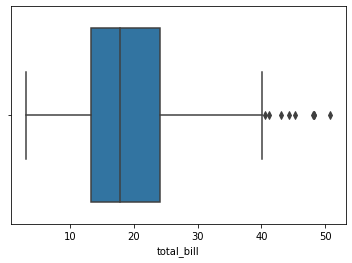

In [111]:
sns.boxplot(df['total_bill'])

❓ What is the [**skewness**](https://whatis.techtarget.com/definition/skewness) value of this distribution?

In [112]:
df['total_bill'].skew()

1.1332130376158205

In [114]:
stats.skew(df['total_bill'])

1.1262346334818638

❓ Create variables `mu` and `sigma` storing the mean and standard deviation of the distribution of tips

In [38]:
mu = df['total_bill'].mean()
print(mu)
sigma = df['total_bill'].std()
print(sigma)

19.78594262295082
8.902411954856856


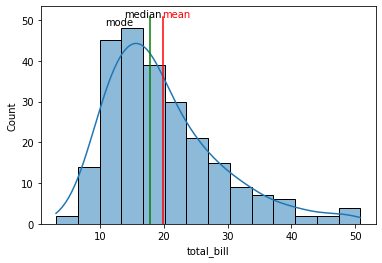

In [37]:
# Get elements
maximum = df['total_bill'].max()
mediane = df['total_bill'].median()

# plot hisplot
sns.histplot(df['total_bill'], kde=True);

# plot mean and median lines and annotate
plt.plot([mu,mu], [0,maximum], c='r')
plt.annotate(text = 'mean', xy=(mu,maximum),c='r')
plt.plot([mediane,mediane], [0,maximum], c='g')
plt.annotate(text = 'median', xy=(mediane-4,maximum));
plt.annotate(text = 'mode', xy=(mediane-7,maximum-2.05));



## Sampling

❓ Pick randomly and with replacement, 10 rows of the dataset, and compute the mean $\bar{x}$ of that sample.

Run this cell a few times, do you get the same result each time? Is this expected?

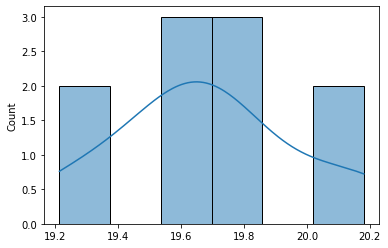

In [133]:
n = 1000 # sample size
N = 1000# Number of iterations
means = [df['total_bill'].sample(n, replace=True).mean() for i in range(N)]

sns.histplot(means, kde=True);

❓ Create a `means` list storing a list of means of $N$ samples of size $n$.

Start with $n = 5$ and $N = 10$

In the same cell, **plot** the distribution of `means`. With $n$ constant, increase $N$ and observe. Then increase $n$ and test another range of $N$. What do you observe?

Try and plot a grid of 6 distributions for $ n \in \{ 1, 5, 50, 100, 500, 1000 \}$

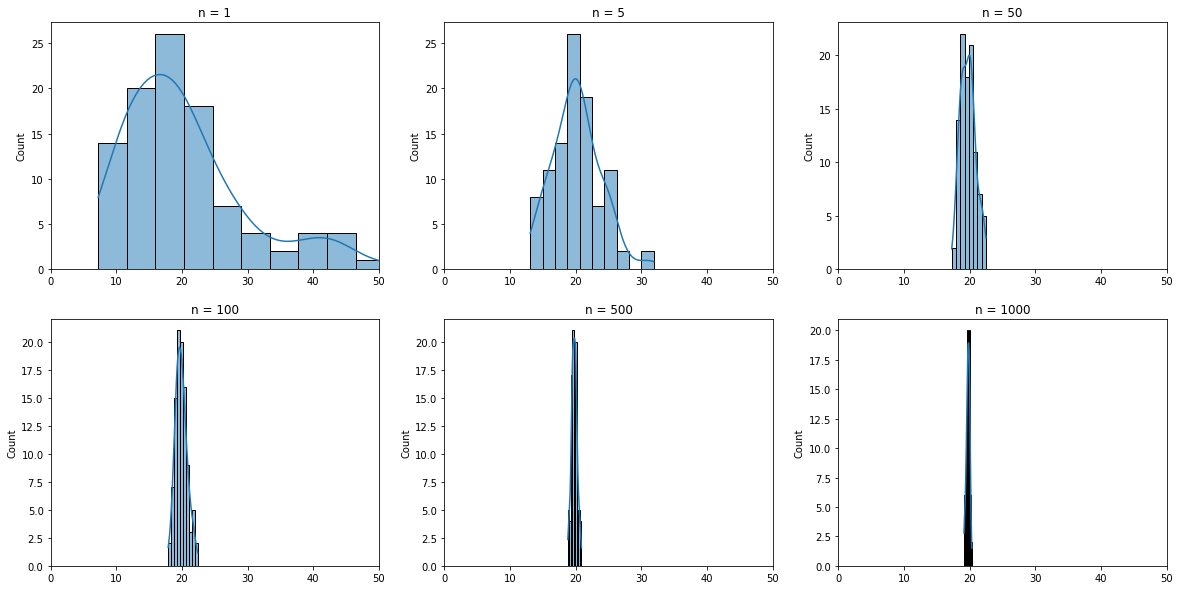

In [136]:
N = 100
n_s =  [1, 5, 50, 100, 500, 1000]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

for n, ax in zip(n_s, axs.flat):
    means = [df['total_bill'].sample(n, replace=True).mean() for i in range(N)]
    sns.histplot(means, kde=True,ax=ax)
    ax.set_title(f'n = {n}')
    ax.set_xlim(0,50)


# Create subplots with 0,50


## Checking the CLT

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/400px-IllustrationCentralTheorem.png)

❓ Let's verify the Central Limit Theorem computationally:

For each value of `n`:
- Compare `mu` with the mean of means
- Compare `sigma` with the standard deviation of the means, (don't forget the $\sqrt n$ adjustment on sigma)
- Compute the `skewness` of the sampling distribution

In [70]:
means = None # 
mu_diff = None
sigma_diff = None
skew = kurtosis = None

### Optionnel

In [91]:
N = 5000

n_s = [1, 5, 50, 100, 500, 1000]

print("        𝚫mu      𝚫sigma   𝚫skew    𝚫kurtosis")
for n in n_s:
    means = [df["total_bill"].sample(n, replace=True).mean() for i in range(N)]
    
    # différence entre la moyenne population - moyenne de la moyenne de sample
    mu_diff = round(abs(mu - np.mean(means)), 5) 
    
    sigma_diff = round(abs(sigma / np.sqrt(n) - np.std(means)), 5)
    
    skew = round(abs(stats.skew(means)), 5)
    
    kurtosis = round(abs(stats.kurtosis(means)), 5)
    
    print(f"n={str(n).ljust(4)}: {str(mu_diff).ljust(7)}  {str(sigma_diff).ljust(7)}  {str(skew).ljust(7)}  {str(kurtosis).ljust(7)}")

        𝚫mu      𝚫sigma   𝚫skew    𝚫kurtosis
n=1   : 0.00025  0.06512  1.07332  1.01735
n=5   : 0.09855  0.10639  0.46075  0.22731
n=50  : 0.01421  0.01611  0.15984  0.03138
n=100 : 0.00746  0.00029  0.19338  0.07348
n=500 : 0.00703  0.00199  0.00068  0.05242
n=1000: 0.00523  0.0015   0.08617  0.03948


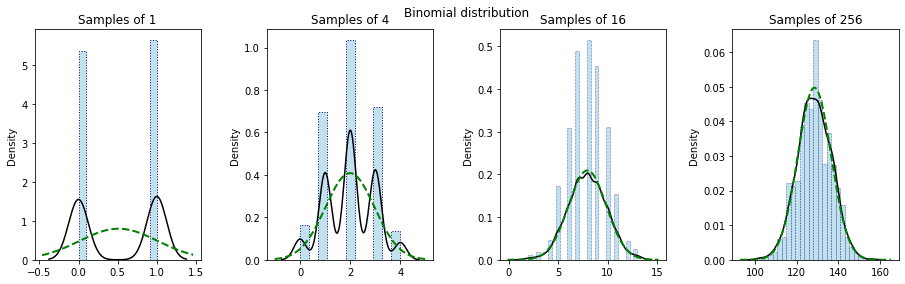

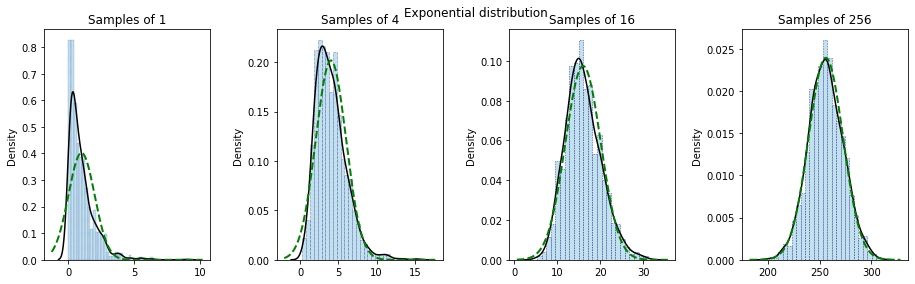

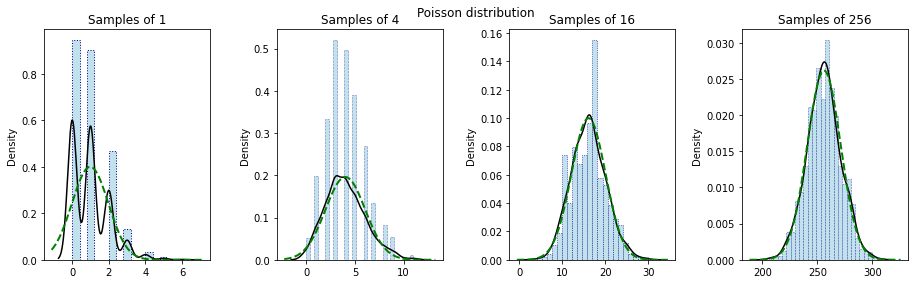

In [69]:
def density_function(kind,draws, size  = 1000):
    if kind.lower() == "binomial":
        arr = np.random.binomial(draws, .5, size)
    if kind.lower() == "exponential":
        arr = sum([np.random.exponential(1, size) for i in range(0, draws)])
    if kind.lower() == "poisson":
        arr = sum([np.random.poisson(1, size) for i in range(0, draws)])
    return arr 


def graph(kind,     size  = 1000):
    draws = [1,4,16,256]
    fig, axs = plt.subplots(1, len(draws), figsize=(15, 4))

    plt.suptitle(f'{kind} distribution', fontdict = {'size': 30}) 
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    
    for draw, ax in zip(draws, axs.flat):
        arr = density_function(kind,draws = draw, size  = 1000)
        sns.histplot(x=arr,
                     stat="density",
                     color="lightblue", edgecolor="darkblue", linestyle=":",
                     ax=ax)

        sns.kdeplot(x=arr,
                    label="Estimated distribution",
                    color="black",
                    linewidth=1.5,
                    ax=ax)

        bounds = ax.get_xbound()

        x = np.linspace(bounds[0], bounds[1], size)
        y = scipy.stats.norm.pdf(x, np.mean(arr), np.std(arr))

        sns.lineplot(x=x, y=y,
                     label="Normal distribution",
                     linestyle="--", linewidth=2, color="green",
                     ax=ax)

        ax.set_title(f"Samples of {draw}")
        ax.get_legend().remove()

graph('Binomial')
graph('Exponential')
graph('Poisson')

## Probability

Imagine I take 100 rows from the dataset. What is the probability that the cumulated total bill is **lower than 1800€**  (18) ? 

❓ Plot `pdf` from [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) using `mu`, `sigma` and `n` correction for the distribution of samples of total bills.

In [140]:
n = 100
stats_norm = stats.norm(mu, sigma / np.sqrt(n))
stats_norm.cdf(18)

0.022421007000834294

In [143]:
x = np.linspace(0,40,100)
y = stats_norm.cdf(x)

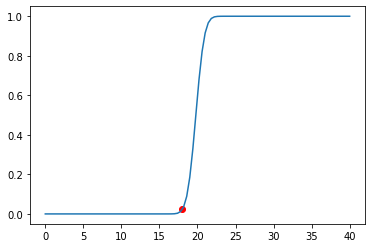

In [148]:
plt.plot(x,y);
plt.scatter(18,stats_norm.cdf(18), c='r');

❓ What is the probability we are looking for? Use the `cdf` method to find it.

In [149]:
stats_norm.cdf(18)

0.022421007000834294

❓ Compute the z-score for the value `18€`

In [151]:
z = (18-mu) / (sigma/np.sqrt(100))
z

-2.006133429914429

❓ Plot the normal distribution (0, 1) and a red dot for the target (use the `pdf`)

In [154]:
z_norm = stats.norm(0, 1)
z_norm.cdf(z)

0.022421007000834294

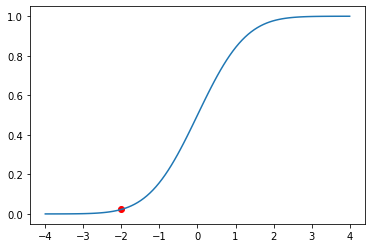

In [155]:
x = np.linspace(-4,4,100)
y = z_norm.cdf(x)
plt.plot(x,y);

plt.scatter(z,z_norm.cdf(z), c='r');